In [11]:
# pip install rasterio

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

In [13]:
with rasterio.open(r'E:\.../Landsat8_SanFrancisco_Polygon_Mosaic_UTM10N.tif') as src:
    print('CRS: ', src.crs)
    print('Bounds:', src.bounds)
    print('Resolution: ', src.res)

CRS:  PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Bounds: BoundingBox(left=542250.0, bottom=4172610.0, right=556440.0, top=4181610.0)
Resolution:  (30.0, 30.0)


In [14]:
with rasterio.open(r'E:\.../Landsat8_SanFrancisco_Polygon_Mosaic_UTM10N.tif') as src:
    print('CRS: ', src.crs)
    print('Bounds:', src.bounds)
    print('Resolution: ', src.res)
    print('Number of bands:', src.count)
    print('Shape:', src.shape)

CRS:  PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Bounds: BoundingBox(left=542250.0, bottom=4172610.0, right=556440.0, top=4181610.0)
Resolution:  (30.0, 30.0)
Number of bands: 4
Shape: (300, 473)


In [15]:
# Path to the exported GeoTIFF (UTM Zone 10N)
input_path = r'E:\.../Landsat8_SanFrancisco_Polygon_Mosaic_UTM10N.tif'
output_path = r'E:\.../Landsat8_SanFrancisco_NDVI_UTM10N.tif'

In [16]:
# Read the GeoTIFF
with rasterio.open(input_path) as src:
    # Read Red (SR_B4, band 3) and NIR (SR_B5, band 4)
    red = src.read(3).astype(float)
    nir = src.read(4).astype(float)
    profile = src.profile.copy()

    # Calculate NDVI: (NIR - Red) / (NIR + Red)
    ndvi = (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

    # Update profile for single-band output
    profile.update(dtype=rasterio.float32, count=1)

    # Save NDVI as a new GeoTIFF
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(ndvi, 1)

    # Optional: Print basic statistics
    print('NDVI min:', np.min(ndvi))
    print('NDVI max:', np.max(ndvi))
    print('NDVI mean:', np.mean(ndvi[np.isfinite(ndvi)]))

NDVI min: -0.9578048149106788
NDVI max: 0.6500560807562786
NDVI mean: 0.0745087320383904


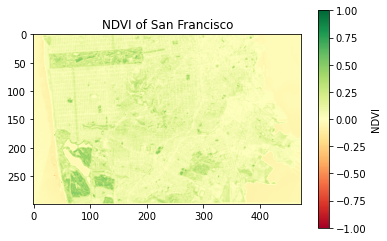

In [17]:
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI of San Francisco')
plt.show()